# All Life Bank Customer Segmentation
### Project 6
Aditya Ohrie

## Background Information
AllLife Bank is looking to focus on its credit card customer base for the next fiscal year. They are looking to improve overall market penetration using personalized marketing campaigns for both new and existing customers. Addtionally, they would like to undertake a deeper analysis into the company's unsatisfactory customer support.

## Objectives
1. Identify key features important to customer clustering
2. Finding Tangible differentiators between clusters
3. Outline and Describe key business recommendations for AllLife Bank

## Contents
1. Installing Python Packages
2. Dataset Exploration
3. Feature Exploration
4. Exploratory Data Analysis
5. Bivariate Feature Analysis and Relationship Exploration
6. Data Pre-processing and Feature Engineering
7. K-Means Clustering
8. Hierarchical Clustering
9. Comparing K-Means and Hierarchical Clusters
10. Cluster Profiling
11. Key Takeaways and Actionable Insights

## 1. Installing Python Packages

In [166]:
import numpy as np # NUMPY is a package for numerical and arthematic operators
import pandas as pd # PANDAS helps with dataframe creation, editing and analysis
import matplotlib.pyplot as plt # MATPLOTLIB is a data vizualization package to create a multitude of graphs
import seaborn as sns # SEABORN is an extremely powerful vizualization tool that sits on top of MATPLOTLIB 
sns.set(color_codes=True) # Adds color palletes to graphs to make interpretation easier
%matplotlib inline 
# setting matplotlib graphs to be shown in the notebook rather than just be saved as objects
import warnings
warnings.filterwarnings('ignore')# hiding all warnings
pd.set_option('display.max_columns', None) # Allows us to see all columns of the dataset during exploration
pd.set_option('display.max_rows', 200) #Setting this allows us to see the first two hundred rows of the dataset
df = pd.read_excel("Credit Card Customer Data.xlsx", index_col=0) # uploading the dataset and storing it as df
from sklearn.linear_model import LinearRegression #allows us to run linear regressions
from sklearn.model_selection import train_test_split # allows us to rendomly split data into train and test groups
from sklearn.metrics import mean_absolute_error#allows us to quickly find the mean absolute error
from sklearn.metrics import mean_squared_error#allows us to quickly find the mean squared error

## Dataset Exploration

### Dataset Shape

In [167]:
df.shape#gives shape of dataset

(660, 6)

**Observations**
1. There are 660 unique customer observations
2. There are 6 features

### Sample Data

In [168]:
np.random.seed(646)
df.sample(n=5)#picks five rows at random

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
408,17703,50000,5,4,0,1
77,90168,17000,1,2,4,6
31,13999,16000,3,1,5,4
591,94700,36000,6,2,2,3
227,55849,8000,1,2,4,8


**Observations**
1. CustomerKey seems to be the unique ID given to each customer
2. All features seem to be numeric features
3. Initital observations do not show any missing values, however we must run further analysis for both missing values and outliers

## Feature Exploration

### Feature Descriptions
|Feature|Description|
|---:|---:|
|**Sl_No**|Primary Recmord Key|         
|**Customer Key**|Unique Customer ID|            
|**Average Credit Limit**|Average Credit Limit for customer for all credit cards with Bank|
|**Total credit cards**|Total cards held by customer|      
|**Total visits bank**|Total customers visits to bank by customer yearly|
|**Total visits online**|Total number of online logins made by customer yearly|
|**Total calls made**|Yearly number of calls made by customer to Support Team|

Let us take a quick look at the feature types

In [169]:
df.dtypes

Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

**Observations**
1. As previously noted, all features are numerical integer features
2. While this dataset is small, future datasets could be made computationally less expensive by storing data as float features

### Check for Missing Values

In [170]:
df.isnull().sum().sort_values(ascending=False)#sums missing values by column and reports results in descending order

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**Observations**

There are no missing values in the dataset and hence we do not have to worry about performing any missing value treatment exercises

### Check for Duplicate Values

In [171]:
df.duplicated().sum()#shows duplicate values

0

**Observations**

There are no duplicated observations- hence we can move foward to Exploratory data analysis

## 4. Exploratory Data Analysis

### Summary Statistics

In [172]:
df.describe().T#shows summary statistics of all numeric features in a transposed manner

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


**Observations**
1. The median Credit Limit is USD18,000 implying that the average customer at AllLife Bank has a high credit-worthiness and hence, the bank has the capacity to upsell them on premium products
2. While there are some customers who never contact customer support, there is atleast one customer who reaches out to customer support at a rate of once every 5 weeks. This implies ineffective concern alleviation which could be the cause of low customer satisfaction.
3. 50% of customers visit the bank twice or less in person which is equivalent to the median customer's online logins
4. However, some customers utilize the online service at a rate of more than once a month compared to the maximum of 5 yearly visits to the bank. The bank should focus on improving its online services to ensure higher satisfaction at the most popular customer touch points
5. The average customer possesses 5 credit cards and hence there is an opportunity for the bank to increase its market share

### Defining function to create boxplots and histograms

In [173]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):#defining function for histogram and boxplot in one figure
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="red"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="orange", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Avg_Credit_Limit

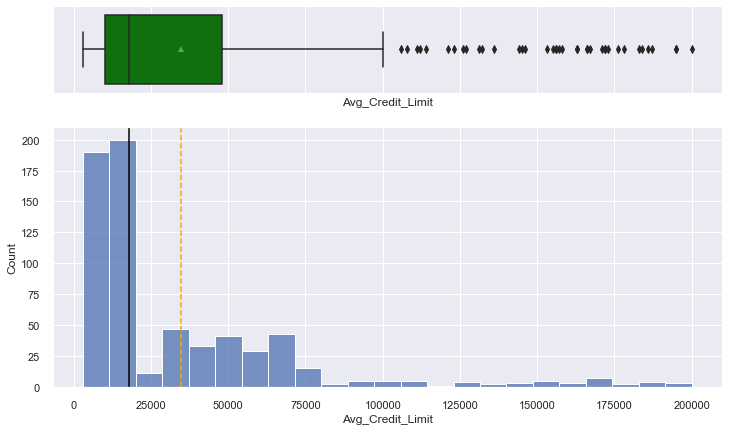

In [174]:
histogram_boxplot(df, "Avg_Credit_Limit")

**Observations**
1. As seen in the histogram, the distribution has a definite right skew implying there are a few customers with very high credit limits compared to the average customer
2. The bottom 50% of customers are extremely densely populated between the credit limits of USD10000 and USD24000. The top 50% of customers have a much higher range which is consistent with the average income distribution of the country. 
3. Further bivariate analysis is required to understand the habits of the different credit limit classes which are correlated to the income as it is an important factor in credit decisions.
4. While there seem to be a significant number of outliers based on the boxplot, we cannot alter or impute these values as they create an important customer segment

### Total_Credit_Cards

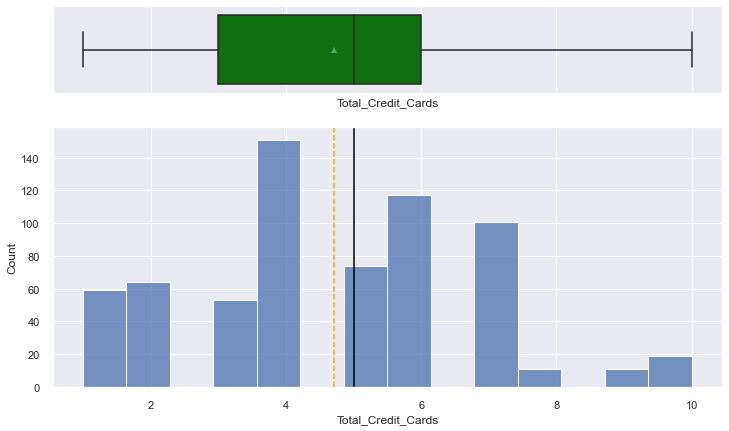

In [175]:
histogram_boxplot(df, "Total_Credit_Cards")

**Observations**
1. Both the mean and median imply that the average AllLife Bank customer carries 5 credit cards.
2. This implies that customers are open to a variety of products and there is a willingness to participate in credit card programs

### Total_visits_bank

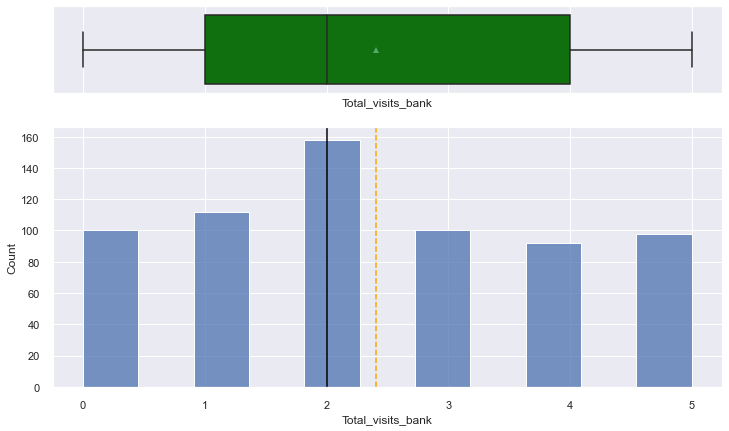

In [176]:
histogram_boxplot(df, "Total_visits_bank")

**Observations**
1. The median customer visits the bank approximately twice a year
2. The distribution is fairly normally distributed implying a variety in customer preference when it comes to in person bank visits

### Total_visits_online

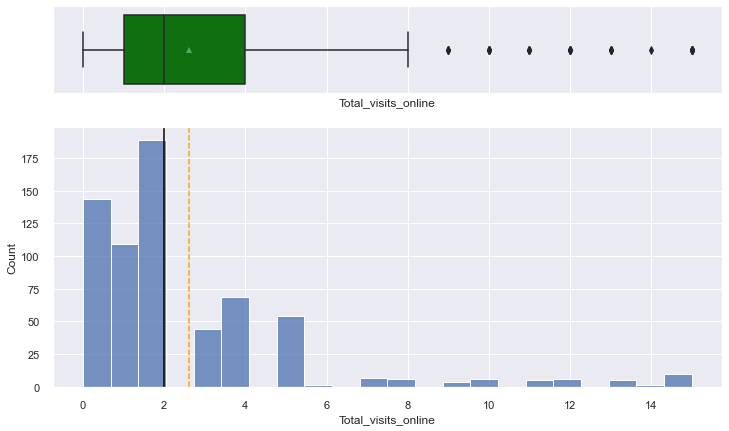

In [177]:
histogram_boxplot(df, "Total_visits_online")

**Observations**
1. Similar to in person visits, the median customer logins into the Bank's Portal twice a year.
2. Contrastly, however, this distribution has a definite right skew, implying there are customers that are more technologically savvy and prefer to use the online services
3. While the boxplot indicates the presence of outliers, customer preferences dictate that we cannot treat them as such.

### Total_calls_made

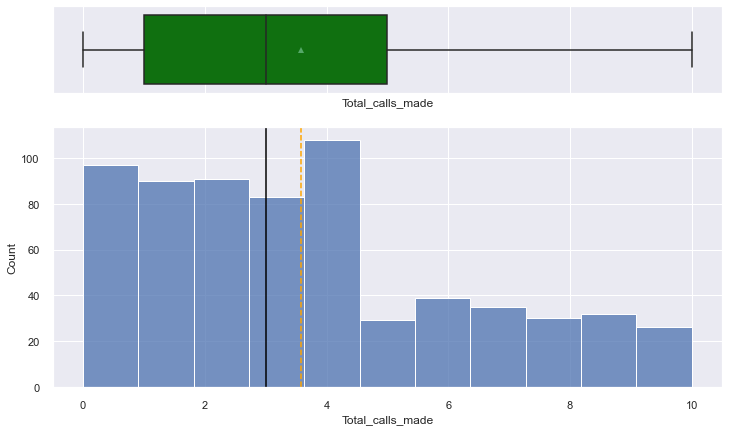

In [178]:
histogram_boxplot(df, "Total_calls_made")

**Observations**
1. The median customer contacts the bank's support team about thrice a year.
2. However, the higher mean indicates some customers continue to reach out to the bank
3. The right skew of the distribution implies a lack of effective problem resolution, possibly leading to the issue of customer satisfaction
4. Effective escalation would help reduce the amount of times the average customer reaches out to the bank's support department

## 5. Bivariate Feature Analysis and Relationship Exploration

### Pair Plot

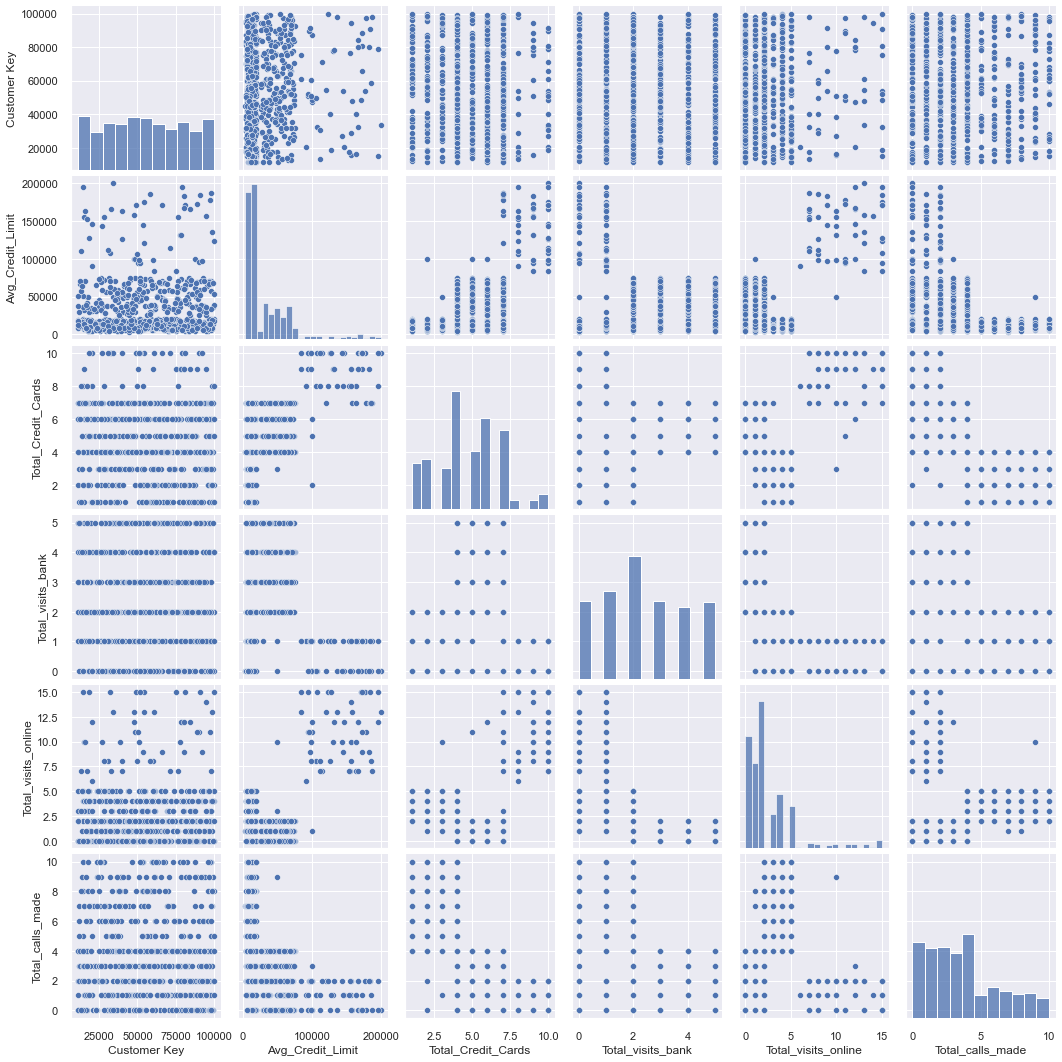

In [179]:
sns.pairplot(data=df)#convieniently creates histograms and scatterplots for each pair of numeric features

**Observations**
1. Average credit limit and total calls made seem to be inversely correlated implying high value customers seem to have less issues with the bank
2. Customers with higher average credit limit seem to carry more cards
3. Customers that avail online features more often seem to contact the support team less
4. Customers with higher credit limits seem to access the bank's online services more often
5. Visits online seems to be inversely correlated with visits bank and hence could show a clustering pattern for customers based on their service preferences

### Total_calls_made vs. Total_visits_bank

<Figure size 864x504 with 0 Axes>

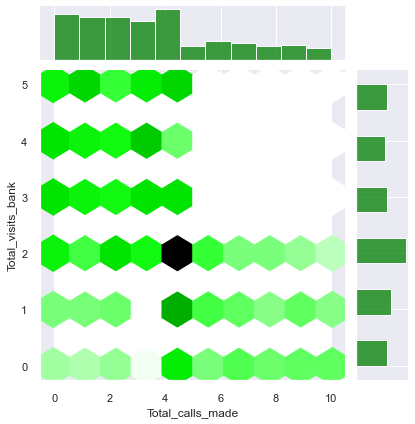

In [180]:
plt.figure(figsize=(12,7))
sns.jointplot(data=df,x="Total_calls_made",y="Total_visits_bank",kind="hex",color="green")

**Observations**
1. The highest concentration is of cutomers that visit the bank twice a year and access the online services 4 times a year
2. There is a definite negative correlation between bank visits and online service usage

### Total_calls_made vs. Avg_Credit_Limit

<AxesSubplot:xlabel='Total_calls_made', ylabel='Avg_Credit_Limit'>

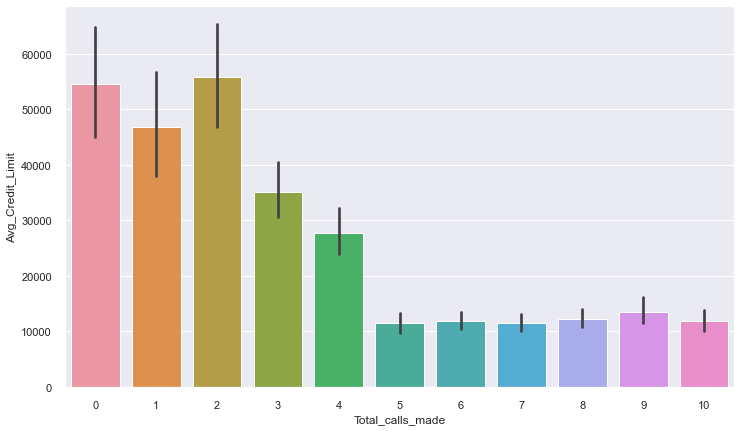

In [181]:
plt.figure(figsize=(12,7))
sns.barplot(data=df,x="Total_calls_made",y="Avg_Credit_Limit")

**Observations**
1. Customers with a lower credit limit seem to contact the bank more often.
2. Customers with a credit limit of USD25k and higher seem to contact the bank 4 or less times a year.
3. The bank should identify issues with products carried by lower credit limit customers as the graph clearly shows.

### Total_Credit_Cards vs. Avg_Credit_Limit

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

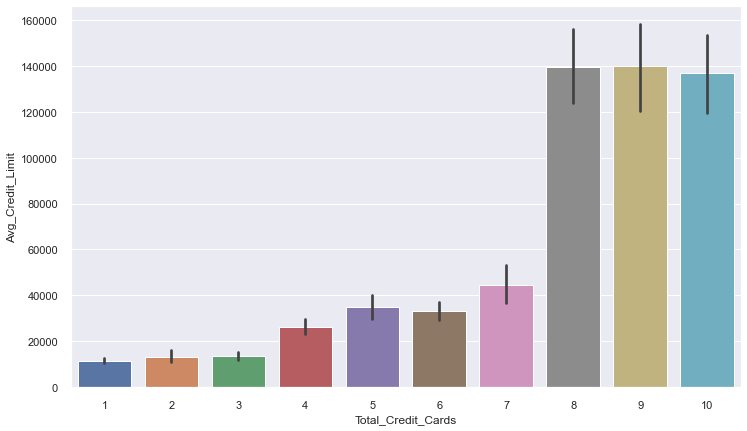

In [182]:
plt.figure(figsize=(12,7))
sns.barplot(data=df,x="Total_Credit_Cards",y="Avg_Credit_Limit")

**Observations**
1. Average credit limits seem to increase gradually as number of credit cards goes up
2. However, after 8 credit cards held, the amount of credit limit increases exponentially.
3. This implies people with higher credit limits seem to carry more cards and hence should be targeted

### Average_Credit_Limit vs. Total_Visits_Bank

<Figure size 864x504 with 0 Axes>

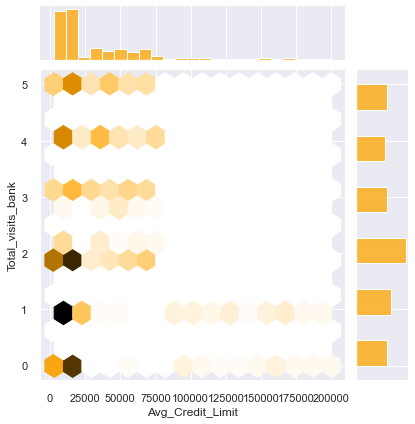

In [183]:
plt.figure(figsize=(12,7))
sns.jointplot(data=df,x="Avg_Credit_Limit",y="Total_visits_bank",kind="hex",color="Orange")

**Observations**
1. There is a definite negative correlation between credit limits and visits to the bank
2. As mentioned above, this could be because of issues with products offered to those with lower credit limits
3. It could also be because of a lack of time resources for those with higher credit limits to sort out issues

### Correlation Heat Map

<AxesSubplot:>

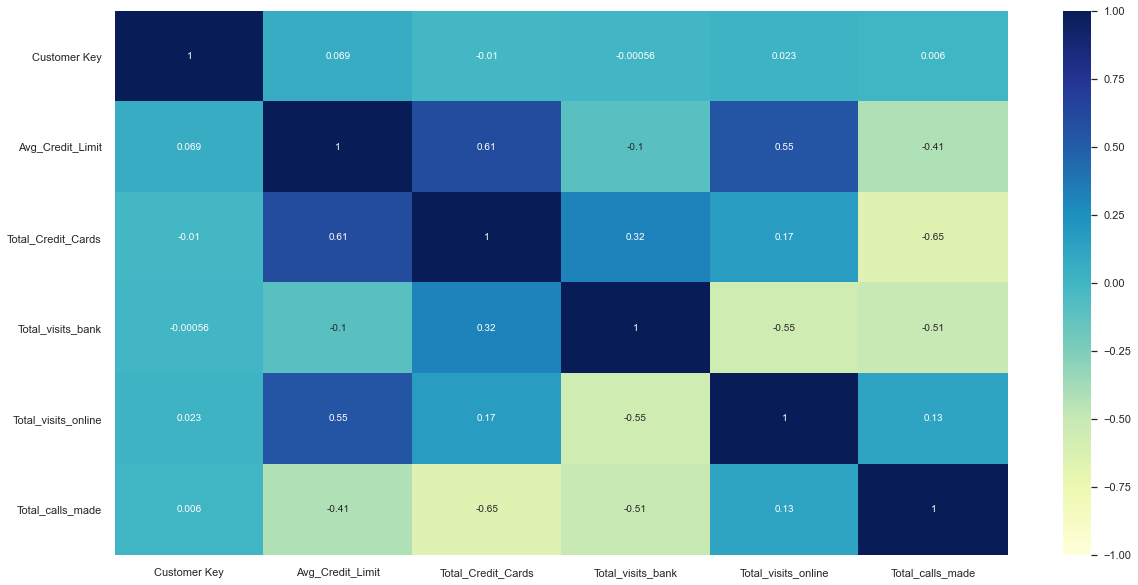

In [184]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="YlGnBu")#creates correlation matrix for all numeric variables

**Observations**
1. Total_Credit_Cards and Avg_Credit_Limit seem to be positively correlated as shown in the graph above.
2. Total_Visits_Online and Avg_Credit_Limit seem to be positively correlated
3. Credit Limit and Total Calls made seem to be negatively correlated. 
4. Total Credit Cards and Total Calls made seem to be negatively correlated

### Customer Profile and Initial Inferences
1. There is a definite negative correlation between credit limits and visits to the bank
2. People with higher credit limits seem to carry more cards and hence should be targeted
3. There seems to be issues with cards offered to lower credit individuals as they contact the support team the most
4. Effective escalation would help reduce the amount of times the average customer reaches out to the bank's support department

## 6. Data Pre-processing and Feature Engineering

### Dropping Customer_Key
As Customer_Key is a unique identifier to the customer, we can drop it as it has no effect on clustering

In [185]:
df.drop('Customer Key', axis=1, inplace=True)# drops feature from dataframe

### Creating Duplicate Dataframes so that original data remains unaffected

In [186]:
data1 = df.copy()#creates opy of dataframe and stores as new dataframe
data1.columns = [c.replace(" ", "_") for c in data1.columns]#replacing spaces in feature names with underscores
data1.info()#checking data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 47.1 KB


In [187]:
data2 = df.copy()
data2.columns = [c.replace(" ", "_") for c in data2.columns]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 47.1 KB


### Scaling datasets
To avoid bias we must scale data to ensure appropriate clustering. Let us start by installing the required packages

In [188]:
from sklearn.preprocessing import StandardScaler#importing to scale data using z-score

In [189]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [190]:
scaler = StandardScaler()#creating function
subset = data1[num_col].copy()
subset_scaled1 = scaler.fit_transform(subset)#applying standard scaler

In [191]:
subset_scaled_kmeans = pd.DataFrame(subset_scaled1, columns=subset.columns)#creating a new dataframe with scaled values

In [192]:
subset2 = data2[num_col].copy()
subset_scaled2 = scaler.fit_transform(subset)

In [193]:
subset_scaled_hc = pd.DataFrame(subset_scaled2, columns=subset2.columns)

## 7. K-Means Clustering
Let us start by installing the necessary packages

In [194]:
pip install -U yellowbrick # used to create elbow curves and silhoutte curves

Note: you may need to restart the kernel to use updated packages.


In [195]:
from scipy.spatial.distance import cdist # to compute distances
from sklearn.cluster import KMeans #to perform k-means
from sklearn.metrics import silhouette_score # to calculate silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer #to visualize elbow curves and silhoutte curves

**Let us now try to figure out how many clusters we should use in k-means**

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429600194368428
Number of Clusters: 7 	Average Distortion: 0.9094049762918911
Number of Clusters: 8 	Average Distortion: 0.8902002183364791


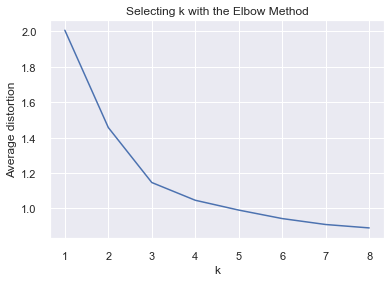

In [196]:
clusters = range(1, 9) #setting number of clusters
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_kmeans) #fitting kmeans model on dataframe
    prediction = model.predict(subset_scaled_kmeans)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_kmeans, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")#creating visual aid for elbow curve
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Observations**
1. The appropriate value for **k** seems to be between 3,4,5 and 6

Let us now take a look at silhouette scores to get a better understanding

For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.2723916744634915)
For n_clusters = 6, the silhouette score is 0.2556621450606854)
For n_clusters = 7, the silhouette score is 0.2481290278388238)
For n_clusters = 8, the silhouette score is 0.22714560093617)
For n_clusters = 9, the silhouette score is 0.21180685617529185)


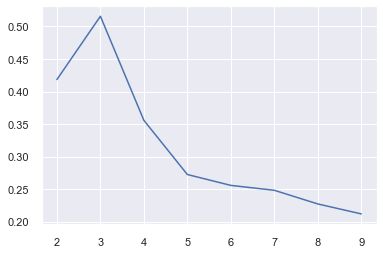

In [197]:
sil_score = [] #creating function 
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_kmeans))
    centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_kmeans, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Observation**
1. Since the silhouette score is higest for n=3 cluesters, we will use that to perform our clustering

In [210]:
kmeans = KMeans(n_clusters=3, random_state=0)# setting number of clusters
kmeans.fit(subset_scaled_kmeans)#fitting on scaled data

KMeans(n_clusters=3, random_state=0)

Let us now add cluster labels to scaled and original data

In [211]:
data1["K_means_segments"] = kmeans.labels_
subset_scaled_kmeans["K_means_segments"] = kmeans.labels_

## 8. Hierarchical Clustering
Let us first import relevant libraries

In [200]:
from scipy.spatial.distance import pdist # to compute distances
from sklearn.cluster import AgglomerativeClustering #to perform hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet #to create dendograms and compute cophenetic correlation

In [201]:
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]#creating list of distance metrics

linkage_methods = ["single", "complete", "average", "weighted"] # creating list of linkage methods

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

**Observations**
1. The cophenetic correlations for all models varies between 0.72 and 0.89

Let us find the highest cophenetic corerelation

In [241]:

print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)#prints ditance, linkage method and cophenetic correlation for highest clustering

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


**Observations**
1. We are getting the highest cophenetic correlation for Euclidean distance and average linkage

In [242]:
Let us now take a look at dendograms for the various linkage methods

SyntaxError: invalid syntax (<ipython-input-242-0ae616a7cc43>, line 1)

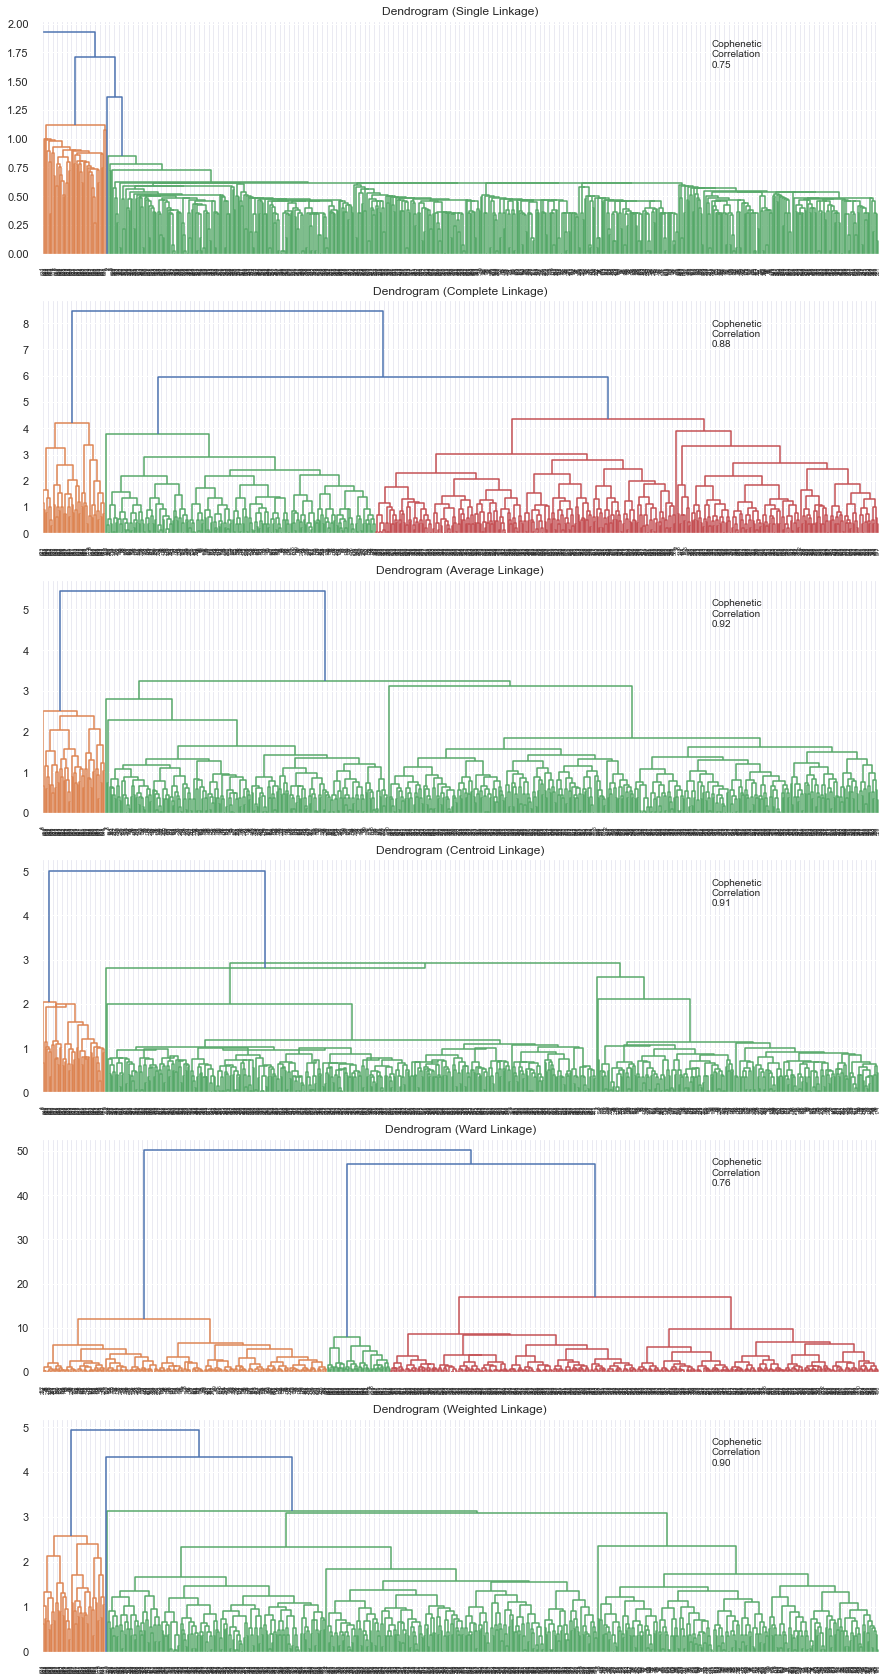

In [218]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(c, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observstions**
1. Average, Centroid and Ward linkages are giving distincgt clusters
As the cophenetic correlation is highest for average linkage, we will proceed with that. Let us fit the model

In [232]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")#creating model
hc_labels = HCmodel.fit_predict(subset_scaled_hc)#capturing labels

Let us now add cluster labels to the scaled and original dataframe

In [243]:
data2["Hierarchical Clustering"] = hc_labels

## Comparing K-Means and Hierarchical Clusters

In [ ]:
### Kmeans Cluster profiling

In [213]:
cluster_profile_kmeans = data1.groupby("K_means_segments").mean()#new dataframe with grouped values

In [216]:
cluster_profile_kmeans["count_in_each_segments"] = (
    data1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [244]:
# let's display cluster profiles
cluster_profile_kmeans.style.highlight_max(color="orange", axis=0)#highlighting maximums

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


**Observations**
1. Cluster 1 seems to have the lowest credit limits on average
2. Cluster 2 has the highest credit limits with the most cards held and the most visits online

Let us look at a boxplot for the data

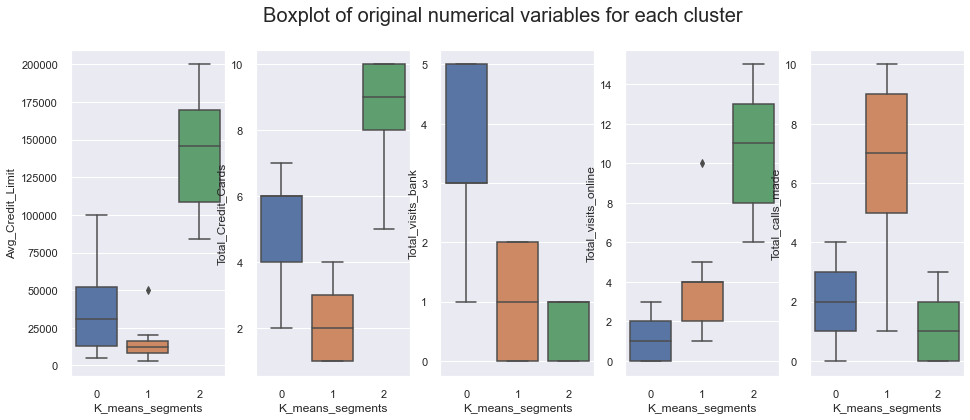

In [245]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=data1["K_means_segments"])
    counter = counter + 1


### Insights

#### Cluster 0
- Cluster 0 consists mostly of people with lower credit limits but not lowest
- Customers in this cluster usually carry between 4 and 6 credit cards
- Customers tend to visit the bank 3-5 times a year
- Online adpotion is lowest in this cluster, implying increased focus on in person or mail marketing
- Customers on average reach out to the support team twice a year

#### Cluster 1
- Cluster 1 comprises of lowest credit limits
- Customer on average only carry two credit cards which might be attributed to lower credit worthiness or adoption
- Customer tend to visit the bank about once a year
- Customer online adoption is marginally higher in cluster 1 compared to cluster 2
- By far, customers in cluster 1 have the most number of calls to support department and we should fix issues in products carried by these customers

#### Cluster 2
- Cluster 2 comprises of high credit worthy individuals
- They carry the most credit cards and hance there is an opportunity to upsell
- Customers in this cluster visit the bank the least number of times
- However, customers in this cluster utilize the online services the most
- Customers in this cluster seem to have the fewest issues and contact support only about once a year on average

### Hierarchical Clustering

In [246]:
cluster_profile_hc = data2.groupby("Hierarchical Clustering").mean()

In [247]:
cluster_profile_hc["count_in_each_segments"] = (
    data2.groupby("Hierarchical Clustering")["Avg_Credit_Limit"].count().values
)

In [248]:
# let's display cluster profiles
cluster_profile_hc.style.highlight_max(color="orange", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
Hierarchical Clustering,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


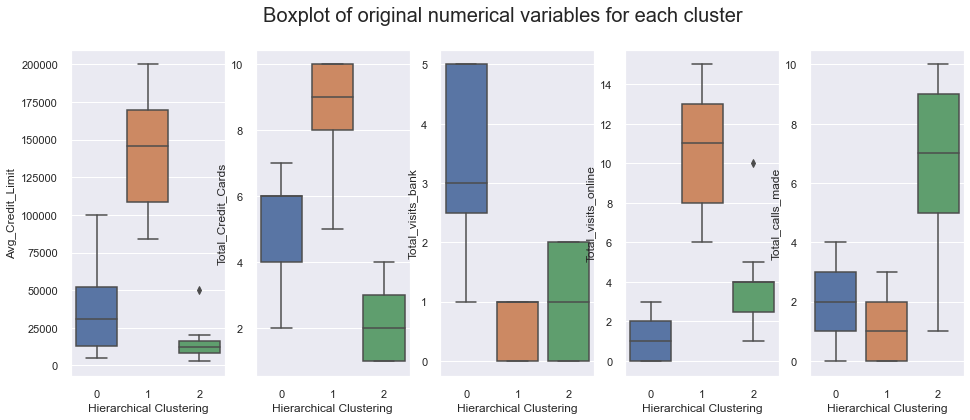

In [240]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=data2["Hierarchical Clustering"])
    counter = counter + 1


### Insights

#### Cluster 0
- Cluster 0 consists mostly of people with lower credit limits but not lowest
- Customers in this cluster usually carry between 4 and 6 credit cards
- Customers tend to visit the bank 3-5 times a year
- Online adpotion is lowest in this cluster, implying increased focus on in person or mail marketing
- Customers on average reach out to the support team twice a year


#### Cluster 1
- Cluster 1 comprises of high credit worthy individuals
- They carry the most credit cards and hance there is an opportunity to upsell
- Customers in this cluster visit the bank the least number of times
- However, customers in this cluster utilize the online services the most
- Customers in this cluster seem to have the fewest issues and contact support only about once a year on average

#### Cluster 2
- Cluster 2 comprises of lowest credit limits
- Customer on average only carry two credit cards which might be attributed to lower credit worthiness or adoption
- Customer tend to visit the bank about once a year
- Customer online adoption is marginally higher in cluster 2 compared to cluster 0
- By far, customers in cluster 2 have the most number of calls to support department and we should fix issues in products carried by these customers


## 11. Key Takeaways and Actionable Insights
- After performing clustering, we saw that customers with higher credit limits have more online adoption. We should target them with online marketing campaigns
- Customers in the higher credit cluster also carry more cards and hence they have an openess to get more cards
-For support issues, customers with products catering to lower credit worthiness seem to have the most problems. The bank must fix issues in these cards to increase customer satisfaction
- Some customers prefer to use in person services compared to online. For these customers mail/ in branch promotions should be run to capture market share